# In class Assignment- 
Analyzing your `time sheet` using Pandas, Matplotlib and Seaborn modules.Save this file as InClassAssignment_Timesheet_xxxx where xxxx will be your initials
- Name:
- Date:
- Version: 

### Import Modules

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Load the dataset and save it to a dataframe named 'df'
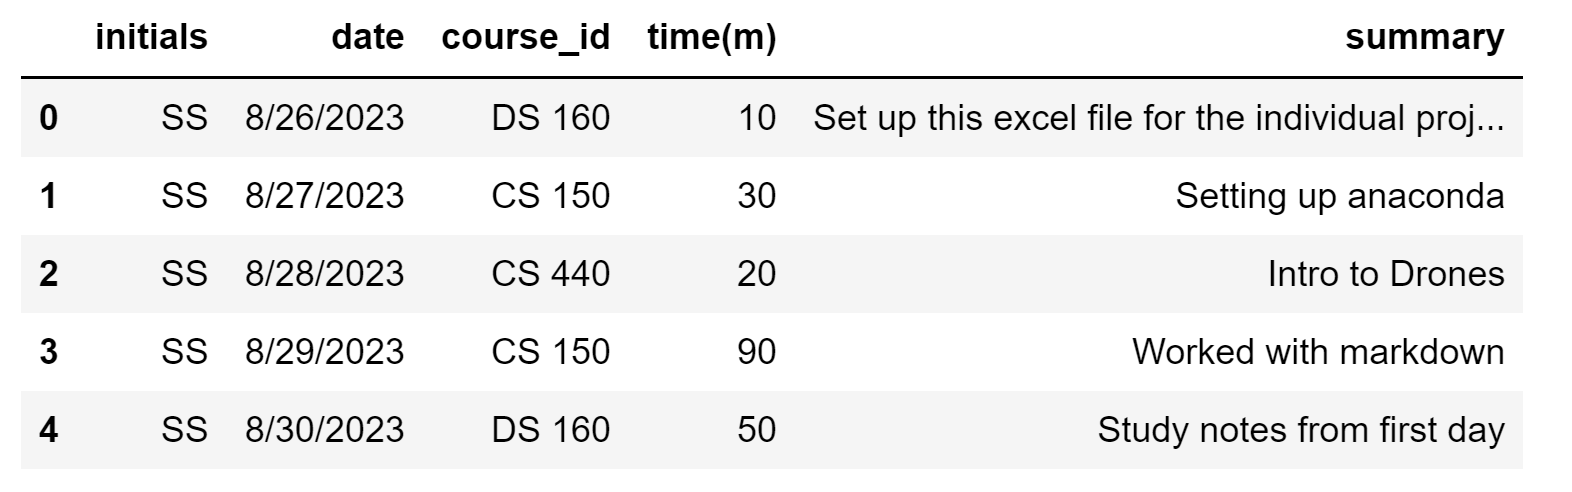

In [8]:
df=pd.read_csv("DSinfo.csv")
df.info

<bound method DataFrame.info of    initials       date    course id  time(m)             summary
0        GT   1/4/2024    DS-160-01     75.0         class intro
1        GT   1/4/2024  MATH-321-01     75.0         class intro
2        GT   1/5/2024  ECON-232-01     50.0         class intro
3        GT   1/5/2024  MATH-340-01      0.0        dont show up
4        GT   1/8/2024  ECON-232-01     50.0     start chapter 3
..      ...        ...          ...      ...                 ...
73       GT   2/9/2024  MATH-340-01      0.0        dont show up
74       GT  2/12/2024  ECON-232-01     50.0            no class
75       GT  2/12/2024  MATH-340-01     50.0        dont show up
76       GT  2/12/2024  MATH-315-01     50.0  finish U functions
77      NaN        NaN          NaN      NaN                 NaN

[78 rows x 5 columns]>

### Investigate your dataset (head, tail, info)
- How many entries in your dataset?
- Is there any missing value?
- What are the data types?

In [19]:
df.head()
df.tail()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   initials   77 non-null     object 
 1   date       77 non-null     object 
 2   course id  77 non-null     object 
 3   time(m)    77 non-null     float64
 4   summary    76 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


Index(['initials', 'date', 'course id', 'time(m)', 'summary'], dtype='object')

there are 78 entries
there are no missing values
the data types are initials, date, course id, time(m) and summary

In [15]:
df['course id'].value_counts()

course id
ECON-232-01    17
MATH-340-01    17
DS-160-01      11
MATH-321-01    11
MATH-315-01    11
BOX-100-01      5
TKD-100-01      5
Name: count, dtype: int64

### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations (sample below)
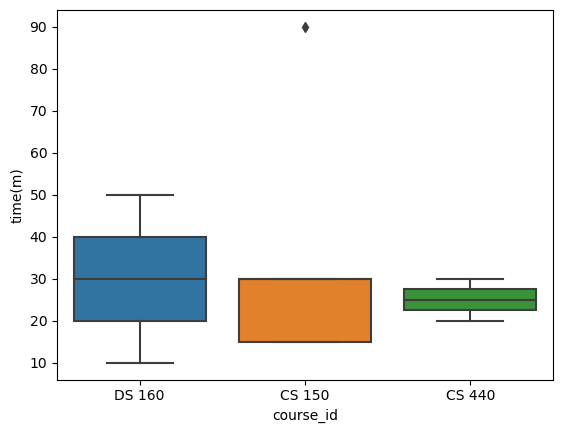

In [17]:
df.describe()

,time(m)
count,77.000000
mean,54.545455
std,19.248749
min,0.000000
25%,50.000000
50%,50.000000
75%,75.000000
max,75.000000


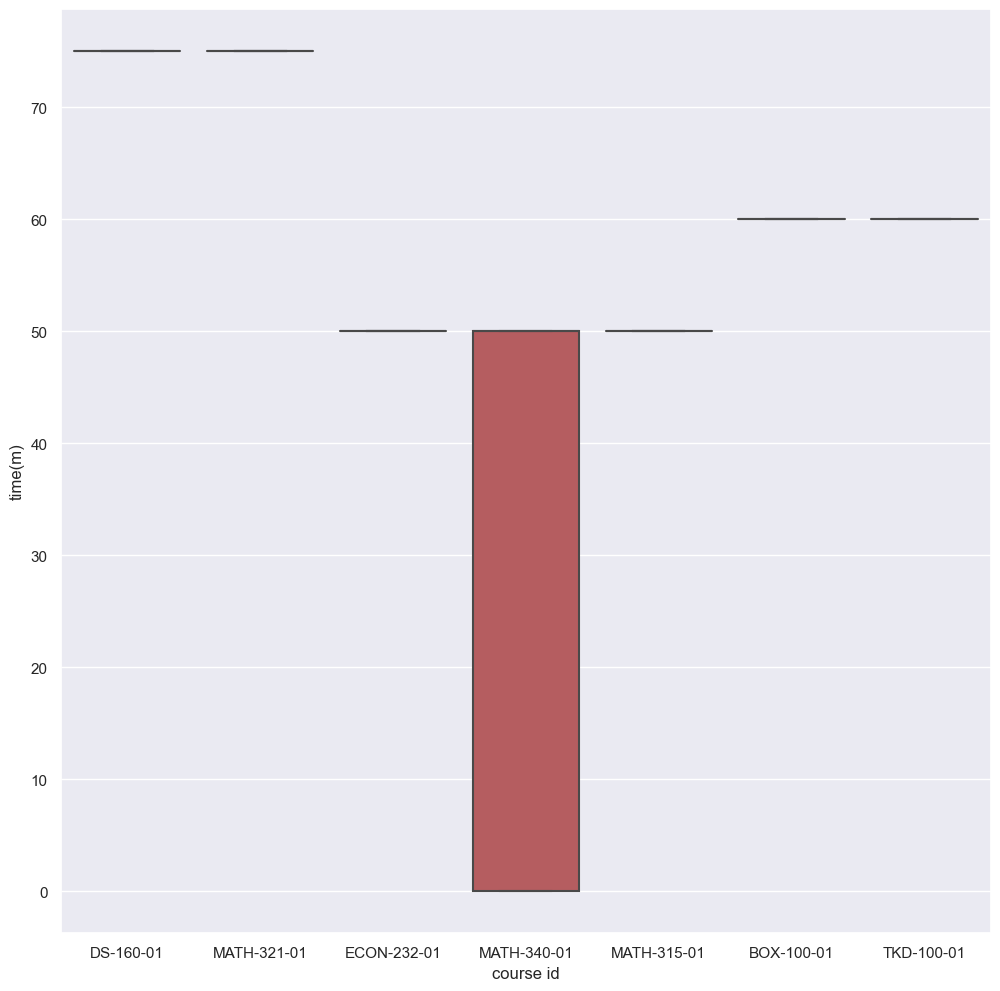

In [60]:
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot(x='course id',
           y='time(m)',
           data=df)
plt.show()

I spent exactly the same amount of time on each course except for MATH-340 where I had some class sessions where I spent 0 minutes in the course and some sessions where I spent 50 minutes in the course.

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days (sample below)
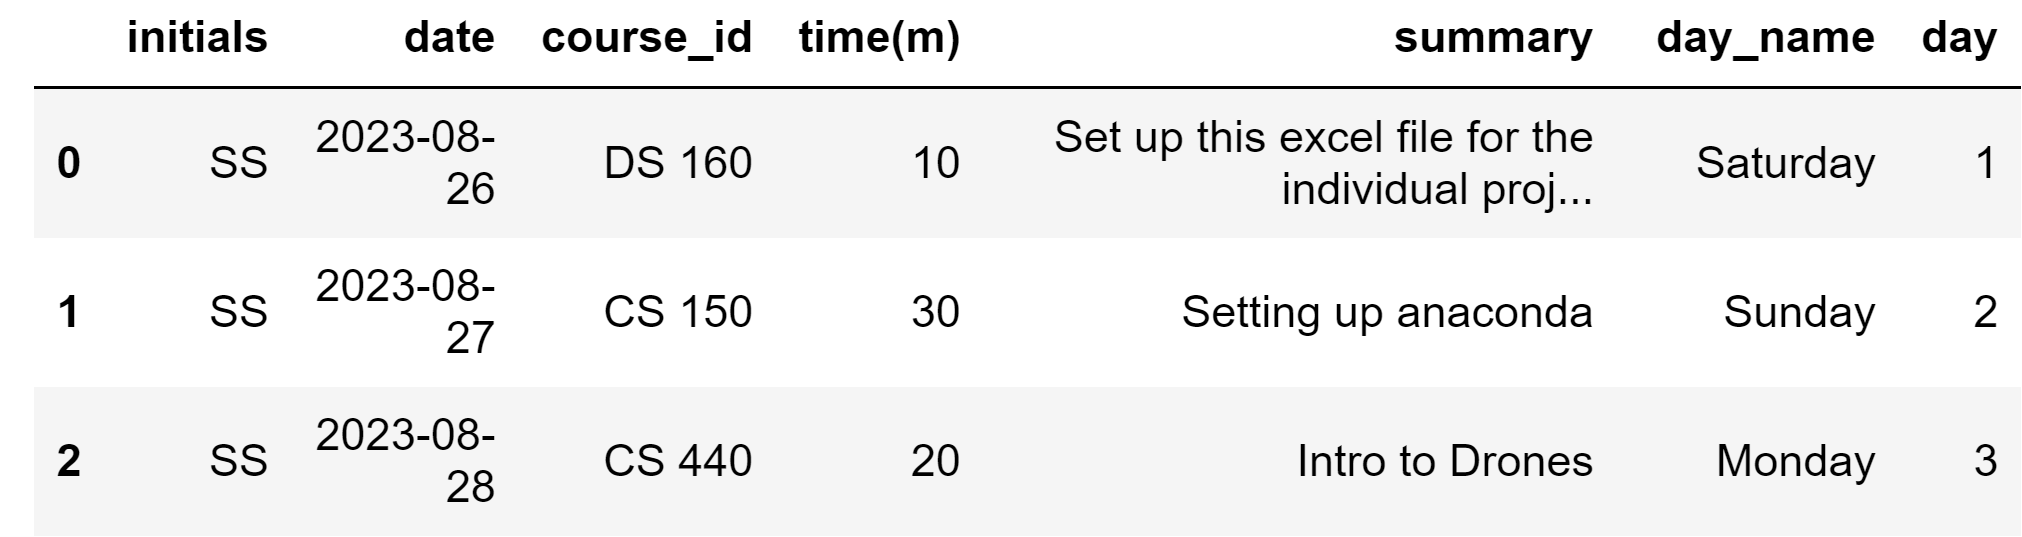
- df['day'] = range(1, len(df) + 1)

In [39]:
df['date']=pd.to_datetime(df['date'])

In [40]:
df['day_name']=df['date'].dt.day_name()

In [42]:
df['day']=range(1,len(df)+1)

In [43]:
df.head()

,initials,date,course id,time(m),summary,day_name,day
0,GT,2024-01-04,DS-160-01,75.0,class intro,Thursday,1
1,GT,2024-01-04,MATH-321-01,75.0,class intro,Thursday,2
2,GT,2024-01-05,ECON-232-01,50.0,class intro,Friday,3
3,GT,2024-01-05,MATH-340-01,0.0,dont show up,Friday,4
4,GT,2024-01-08,ECON-232-01,50.0,start chapter 3,Monday,5


### Data Visualization:
1. Create a histogram to visually represent the distribution of time spent.
2. Create a  bar chart (sample below) to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
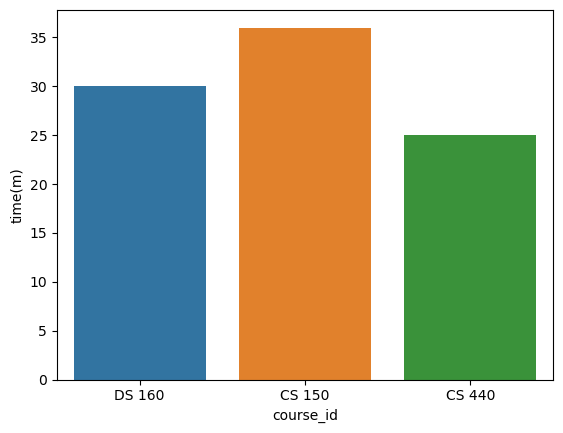

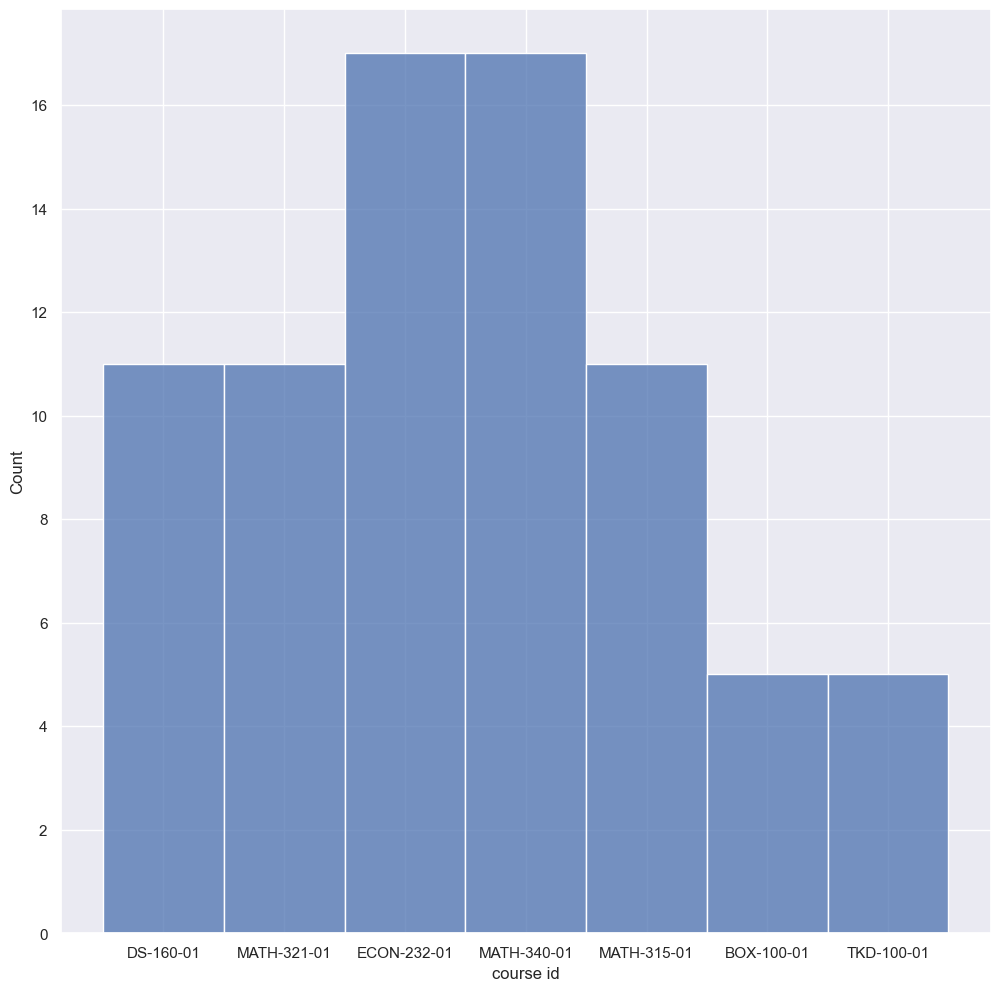

In [58]:
sns.histplot(x='course id',
           data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

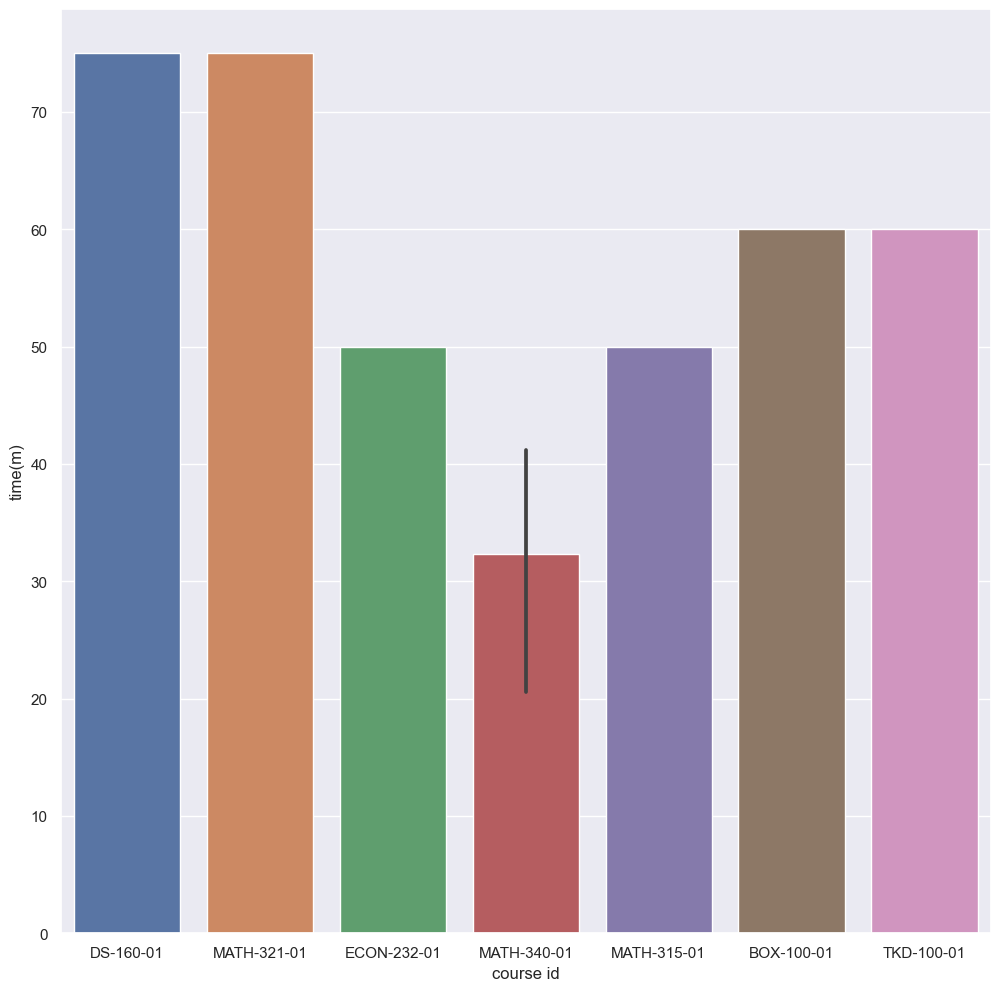

In [47]:
sns.barplot(x='course id',
           y='time(m)',
           data=df)
plt.show

I spent the most time on DS-160 and MATH-321 and spent the least amout of time on MATH-340

### Activity Counts:

Count the occurrences of each course in the dataset to see `how often` you engaged in each.

In [48]:
df['course id'].value_counts()

course id
ECON-232-01    17
MATH-340-01    17
DS-160-01      11
MATH-321-01    11
MATH-315-01    11
BOX-100-01      5
TKD-100-01      5
Name: count, dtype: int64

### Time Trends:

Plot a line chart (sample below) to visualize how time spent on activities changes over the observed days.
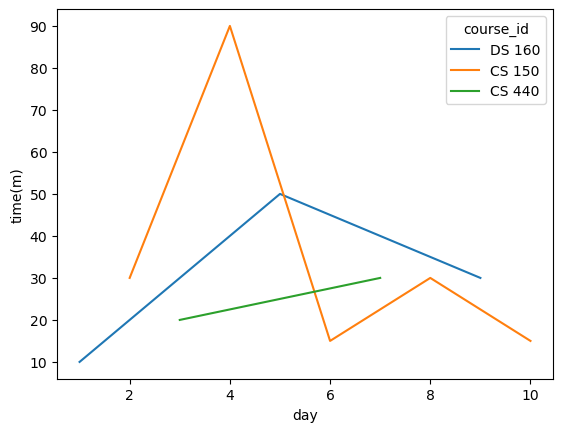

<Axes: xlabel='day', ylabel='time(m)'>

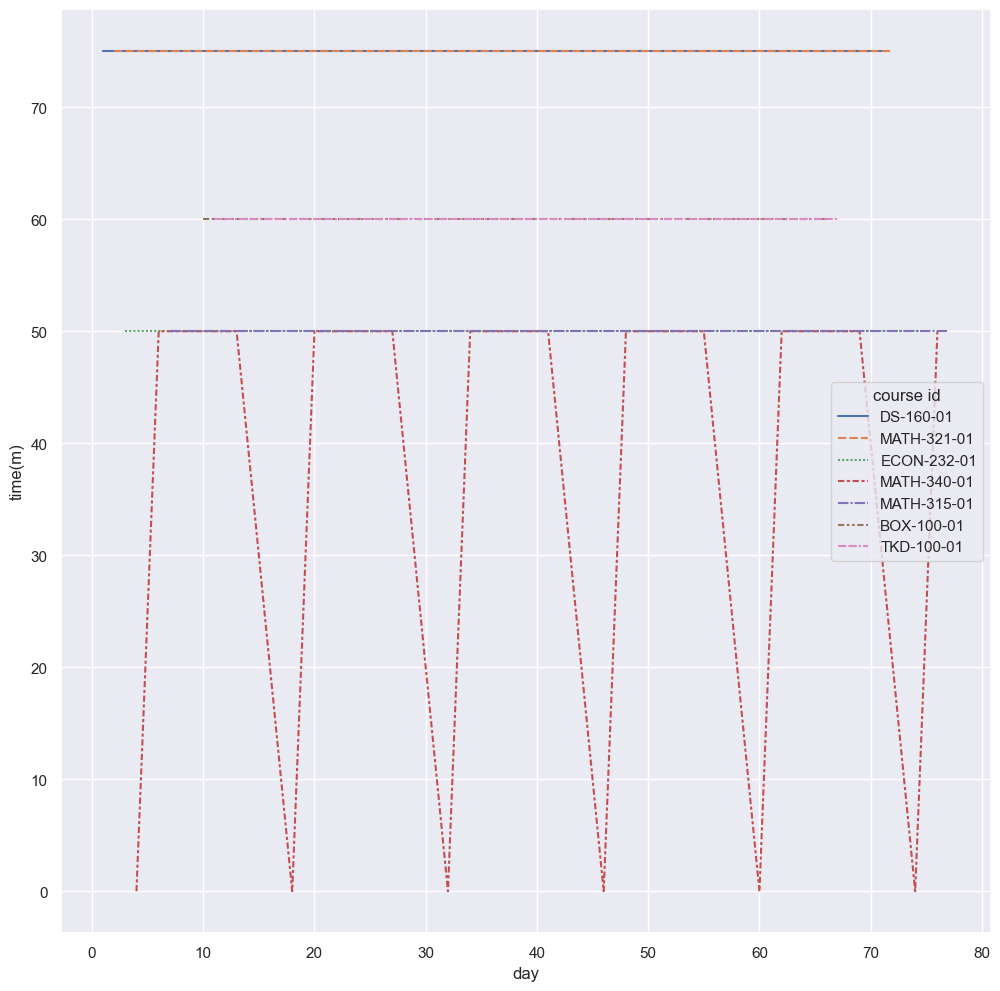

In [53]:
sns.lineplot(x='day',
            y="time(m)",
             hue='course id',
             style='course id',
            data=df)

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [54]:
df.groupby(['course id'])['time(m)'].sum()

course id
BOX-100-01     300.0
DS-160-01      825.0
ECON-232-01    850.0
MATH-315-01    550.0
MATH-321-01    825.0
MATH-340-01    550.0
TKD-100-01     300.0
Name: time(m), dtype: float64

DS-160, MATH321, and ECON-232 cecieved the most time while BOX-100 and TKD-100 received the least time

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less (sample below).
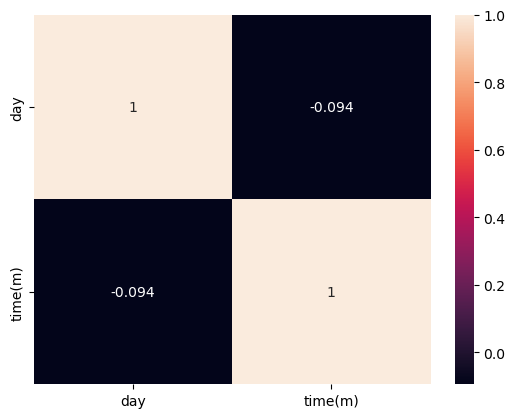

              day   time(m)
day      1.000000 -0.043541
time(m) -0.043541  1.000000


<Axes: >

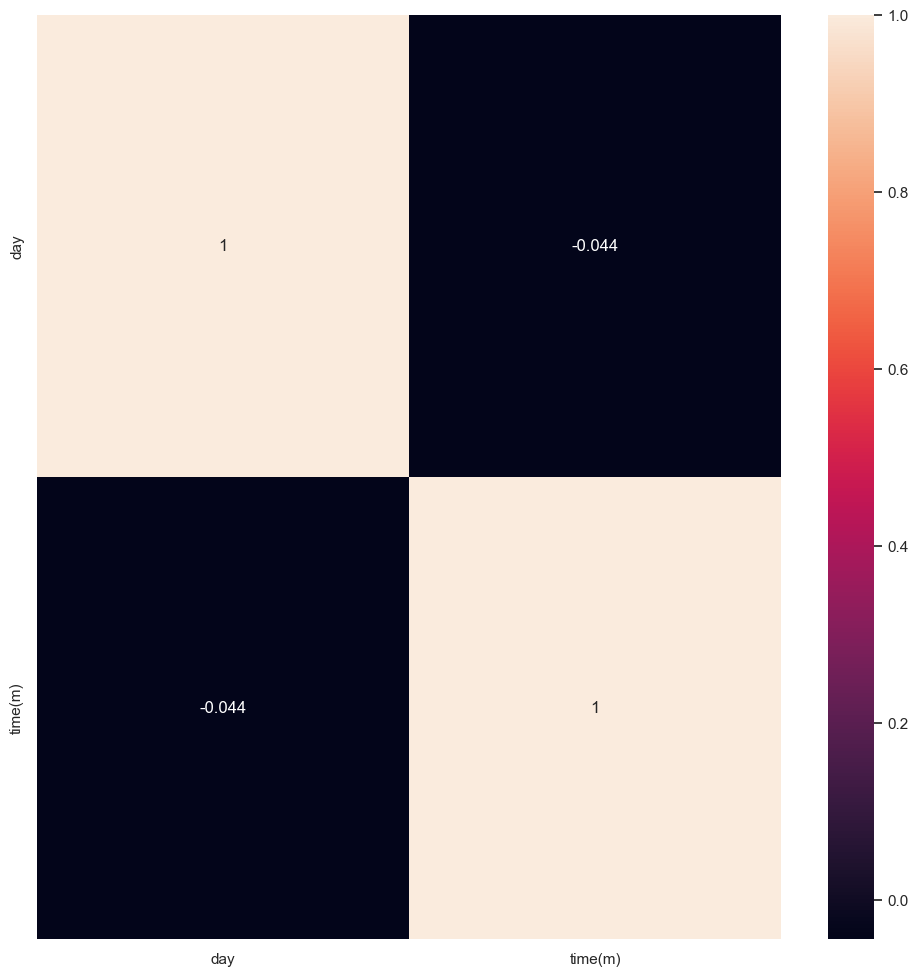

In [57]:
corr=df[['day',
               'time(m)']].corr()
print(corr)
sns.heatmap(corr, annot=True)

### Your Reflection on the findings

the data shows that MATH-321 and DS-160 have the longest course session and ECON-231 and MATH-340 have the most sessions. the most total time was spent on DS-160, MATH-321, and ECON-232. There was almost no variation in how much time was spent in each course each day.

### Submit the work by Friday 16th end of the day